### Course 3 Assignment
# Turtle Games: Improving Overall Sales Performance


Turtle Games is a retailer and manufacturer of games. They would like to improve their overall sales performance. By getting a better understanding of their customers, they can formulate a more effective marketing strategy to increase sales. This Jupyter Notebook looks at customer reviews to help the marketing team at Turtle Games answer the following:
 - What are customers saying about Turtle Games?
 - Who should we prioritise marketing efforts for?
 - Should we have different marketing strategies for different types of customers?

# 

## Importing Necessary Libraries

To carry out this analysis for Turtle Games, certain libraries need to be imported. These libraries are necessary as they will help to perform tasks such as importing data, data visualisation, linear regression analysis, clustering analysis, sentiment analysis, and so on. 

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from scipy.spatial.distance import cdist
from scipy.stats import norm

import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

!pip install textblob
from textblob import TextBlob

!pip install wordcloud
from wordcloud import WordCloud

import os 

import warnings
warnings.filterwarnings('ignore')

# 

## Loading and Inspecting the Data

We will look at the customer reviews data set for the analysis carried out in this Jupyter Notebook. The sales data set has been investigated in R.

We will start by loading the customer reviews data set into a DataFrame. It is then important we carry out appropriate data cleaning before starting the analysis.

In [2]:
# Loading the CSV file as reviews
reviews = pd.read_csv('turtle_reviews.csv')

# Viewing the DataFrame
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Viewing the metadata
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


Here we can see that there are no missing values in any of the columns.

In [4]:
# Determining the descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [5]:
# Determining the categories of the categorical variables
print("Gender:\n", reviews['gender'].value_counts())
print("\nEducation:\n", reviews['education'].value_counts())
print("\nLanguage:\n", reviews['language'].value_counts())
print("\nPlatform:\n", reviews['platform'].value_counts())

Gender:
 Female    1120
Male       880
Name: gender, dtype: int64

Education:
 graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

Language:
 EN    2000
Name: language, dtype: int64

Platform:
 Web    2000
Name: platform, dtype: int64


Here we can see that all reviews are in English and obtained from the website of Turtle Games. Therefore, we can remove the language and platform columns as their lack of variation makes them not very useful. 

In [6]:
# Dropping unnecessary columns: language and platform
reviews.drop(['language', 'platform'], axis = 1, inplace = True)

# Checking that these columns have been dropped
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [7]:
# Renaming the remuneration (k£) and spending_score (1-100) columns
# to make them easier to call upon
reviews.rename(columns = {'remuneration (k£)':'remuneration',
                          'spending_score (1-100)':'spending_score'},
               inplace = True)

# Checking that these columns have changed
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [8]:
# Saving a copy of this now cleaned reviews DataFrame as a CSV file
reviews.to_csv('turtle_reviews_cleaned.csv', index = False)

In [9]:
# Import the new CSV file with Pandas
df_reviews = pd.read_csv('turtle_reviews_cleaned.csv')

# Viewing the DataFrame
df_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# Viewing the metadata
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


All looks good with this cleaned customer reviews data set. Now we can start our analysis.

# 

## What Are Customers Saying About Turtle Games?

To answer this question we will first look at identifying the words that feature the most in customer reviews and customer review summaries. We will then try to get a better understanding of customer opinions on Turtle Games by carrying out sentiment analysis on the customer reviews and customer review summaries. 

In [11]:
# Creating a new DataFrame containing just review and summary
opinions = df_reviews[['review', 'summary']]

# Viewing the DataFrame
opinions.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [12]:
# Viewing the metadata of this new DataFrame
opinions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


There are no missing values in this data set.

### Preparing the data for Natural Language Processing (NLP)

In [13]:
# Review column: 
# Changing each word to lower case and then joining them together with a space
opinions['review'] = opinions['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Previewing the result
opinions['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [14]:
# Summary column:
# Changing each word to lower case and then joining them together with a space
opinions['summary'] = opinions['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Previewing the result
opinions['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [15]:
# Review column:
# Replacing all the punctuations with nothing
opinions['review'] = opinions['review'].str.replace('[^\w\s]','')

# Previewing the result
opinions['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [16]:
# Summary column:
# Replacing all the punctuations with nothing
opinions['summary'] = opinions['summary'].str.replace('[^\w\s]','')

# Previewing the result
opinions['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

In [17]:
# Checking the number of duplicated entries
print('Number of duplicates in review column: ', opinions['review'].duplicated().sum())
print('\nNumber of duplicates in summary column: ', opinions['summary'].duplicated().sum())
print('\nNumber of duplicates across both columns: ', opinions.duplicated().sum())

Number of duplicates in review column:  50

Number of duplicates in summary column:  649

Number of duplicates across both columns:  39


In [18]:
# Checking the number of rows before removing duplicates
opinions.shape

(2000, 2)

In [19]:
# Dropping duplicates across both columns
opinions = opinions.drop_duplicates()

# Remembering to reset the index
opinions.reset_index(drop=True, inplace=True)

# Viewing the DataFrame to check that the index has reset
opinions.tail()

,review,summary
1956,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,great game did not think i would like it when ...,super fun
1958,great game for all keeps the mind nimble,great game
1959,fun game,four stars
1960,this game is fun a lot like scrabble without a...,love this game


In [20]:
# Checking the number of rows after removing duplicates
opinions.shape

(1961, 2)

39 rows have been removed.

### Creating WordClouds to display the frequency distribution

In [21]:
# Creating a copy of the opinions DataFrame
opinions_copy = opinions

# Viewing this DataFrame
opinions_copy.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [22]:
# Tokenizing the words in the review column
opinions_copy['r_tokens'] = opinions_copy['review'].apply(word_tokenize)

# Previewing the results
opinions_copy['r_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: r_tokens, dtype: object

In [23]:
# Defining an empty list to store the tokens
all_r_tokens = []

# For loop to add each token to the list
for i in range(opinions_copy.shape[0]):
    all_r_tokens = all_r_tokens + opinions_copy['r_tokens'][i]

In [24]:
# Calculating the frequency distribution of words used in reviews
fdist_reviews = FreqDist(all_r_tokens)

# Viewing the frequency distbribution
fdist_reviews

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [25]:
# Tokenizing the words in the summary column
opinions_copy['s_tokens'] = opinions_copy['summary'].apply(word_tokenize)

# Previewing the results
opinions_copy['s_tokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: s_tokens, dtype: object

In [26]:
# Defining an empty list to store the tokens
all_s_tokens = []

# For loop to add each token to the list
for i in range(opinions_copy.shape[0]):
    all_s_tokens = all_s_tokens + opinions_copy['s_tokens'][i]

In [27]:
# Calculating the frequency distribution of words used in summaries
fdist_summaries = FreqDist(all_s_tokens)

# Viewing the frequency distbribution
fdist_summaries

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [28]:
# Creating an object that only contains alphanumeric characters from reviews
all_r_tokens1 = [word for word in all_r_tokens if word.isalnum()]

In [29]:
# Creating an object that only contains alphanumeric characters from summaries
all_s_tokens1 = [word for word in all_s_tokens if word.isalnum()]

In [30]:
# Creating a set of English stopwords
english_stopwords = set(stopwords.words('english'))

In [31]:
# Create a filtered list of tokens from reviews without stopwords
all_r_tokens2 = [x for x in all_r_tokens1 if x.lower() not in english_stopwords]

# Defining an empty string variable to store the filtered tokens
all_r_tokens2_string = ''

# For loop to add each filtered token to the string
for value in all_r_tokens2:
    all_r_tokens2_string = all_r_tokens2_string + value + ' '

In [32]:
# Create a filtered list of tokens from summaries without stopwords
all_s_tokens2 = [x for x in all_s_tokens1 if x.lower() not in english_stopwords]

# Defining an empty string variable to store the filtered tokens
all_s_tokens2_string = ''

# For loop to add each filtered token to the string
for value in all_s_tokens2:
    all_s_tokens2_string = all_s_tokens2_string + value + ' '

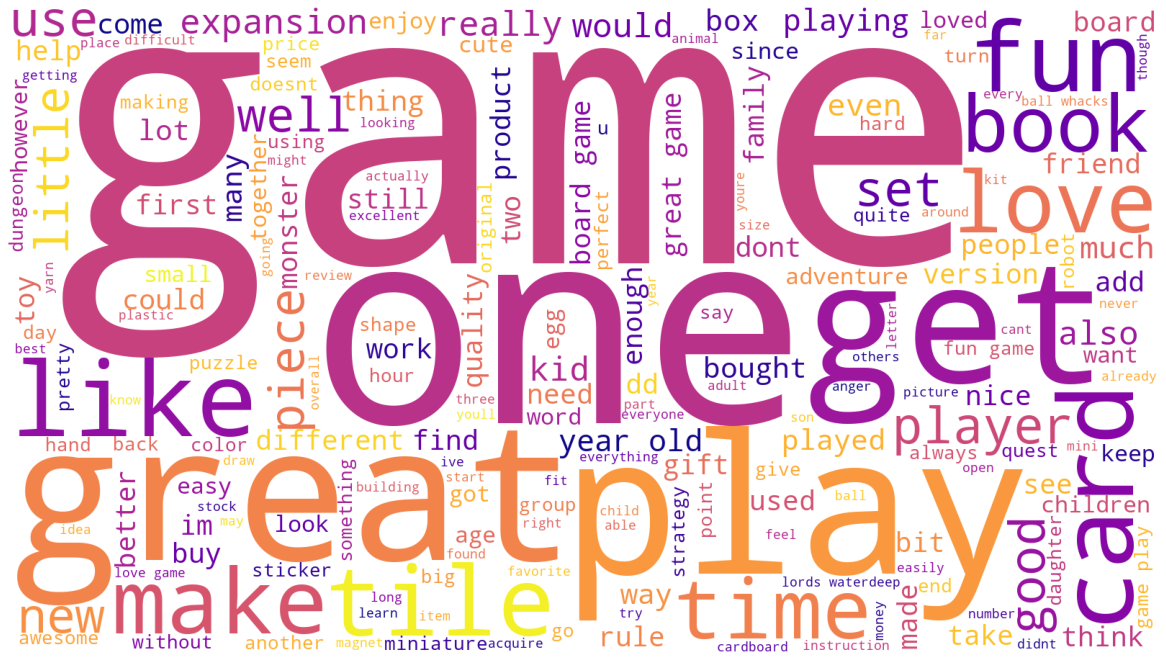

In [33]:
# REVIEW

# Creating a WordCloud object without stopwords
wc_reviews1 = WordCloud(width = 1600, height = 900,
                       background_color = 'white',
                       colormap = 'plasma',
                       stopwords = 'none',
                       min_font_size = 10).generate(all_r_tokens2_string)

# Plotting the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wc_reviews1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

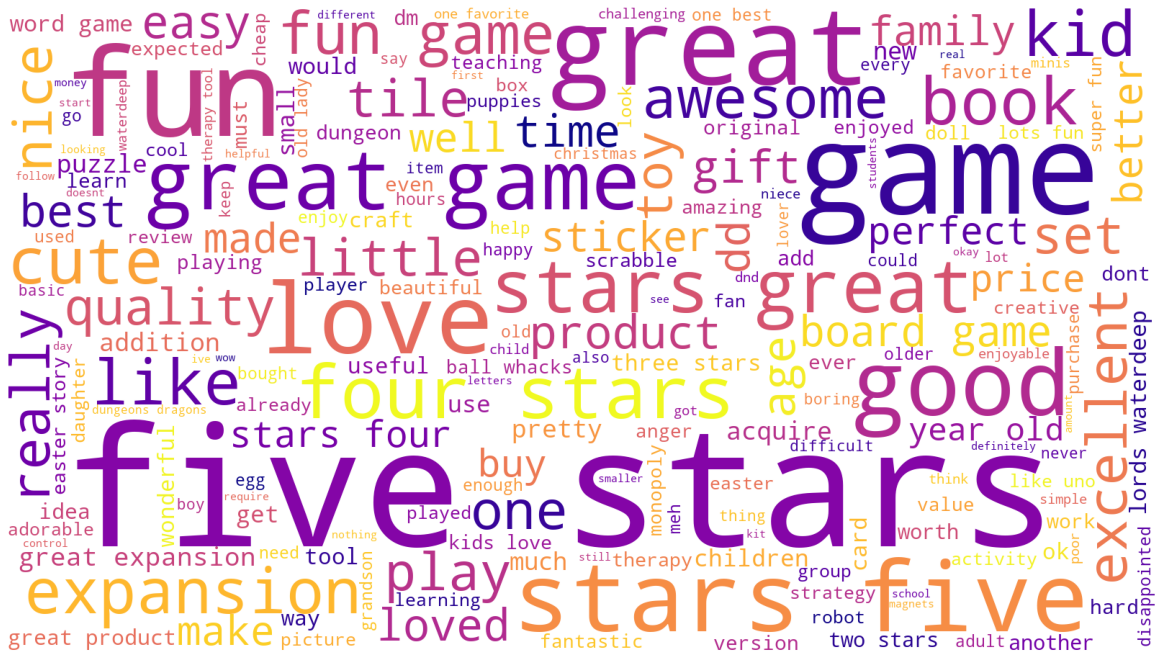

In [34]:
# SUMMARY

# Creating a WordCloud object without stopwords
wc_summaries1 = WordCloud(width = 1600, height = 900,
                       background_color = 'white',
                       colormap = 'plasma',
                       stopwords = 'none',
                       min_font_size = 10).generate(all_s_tokens2_string)

# Plotting the WordCloud image
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wc_summaries1)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()


### Identifying the most common words and their polarity

In [35]:
# Identifying the 15 most common words used in reviews
# Generating a DataFrame of these using the Counter function
counts_review = pd.DataFrame(Counter(all_r_tokens2).most_common(15),
                             columns = ['Word', 'Frequency']).set_index('Word')
# Displaying the result
counts_review

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


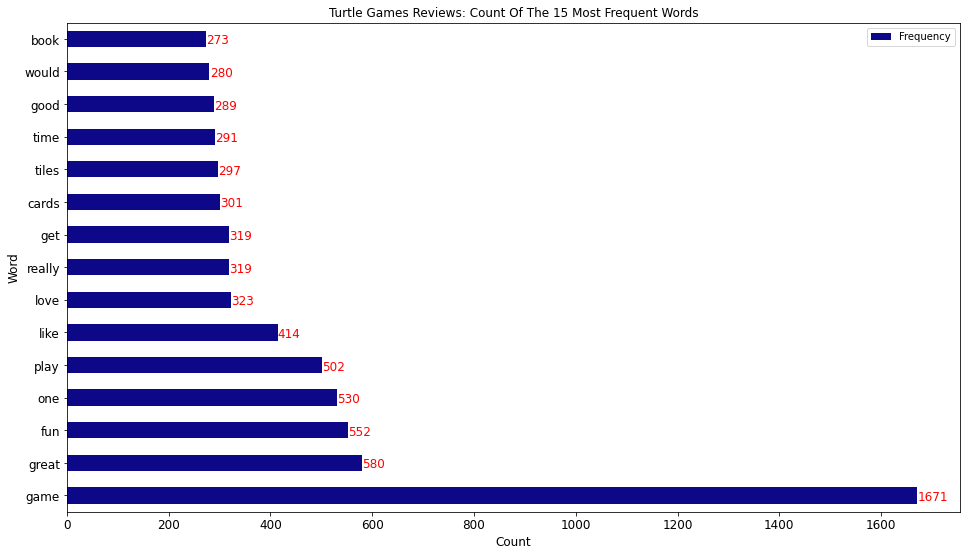

In [36]:
# REVIEW

# Creating a barplot to display the frequency counts
ax = counts_review.plot(kind = 'barh', 
                        figsize = (16, 9), 
                        fontsize = 12, 
                        colormap = 'plasma')

# Changing the axis labels and title
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Word', fontsize = 12)
ax.set_title('Turtle Games Reviews: Count Of The 15 Most Frequent Words', fontsize = 12)

# For loop to create labels for each bar
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'red')

In [37]:
# Creating a copy of the DataFrame containing the top 15 words in reviews
# Resetting the index
top15_review = counts_review.reset_index()

# Viewing the DataFrame 
top15_review

,Word,Frequency
0,game,1671
1,great,580
2,fun,552
3,one,530
4,play,502
5,like,414
6,love,323
7,really,319
8,get,319
9,cards,301


In [38]:
# Defining a function to extract the polarity score for each word/comment
def generate_polarity(word):
    return TextBlob(word).sentiment[0]

# Populating a new column with the polarity scores for each word
top15_review['Polarity'] = top15_review['Word'].apply(generate_polarity)

# Viewing the result
top15_review

,Word,Frequency,Polarity
0,game,1671,-0.4
1,great,580,0.8
2,fun,552,0.3
3,one,530,0.0
4,play,502,0.0
5,like,414,0.0
6,love,323,0.5
7,really,319,0.2
8,get,319,0.0
9,cards,301,0.0


In [39]:
# Identifying the 15 most common words used in summaries
# Generating a DataFrame of these using the Counter function
counts_summary = pd.DataFrame(Counter(all_s_tokens2).most_common(15),
                              columns = ['Word', 'Frequency']).set_index('Word')
# Displaying the result
counts_summary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


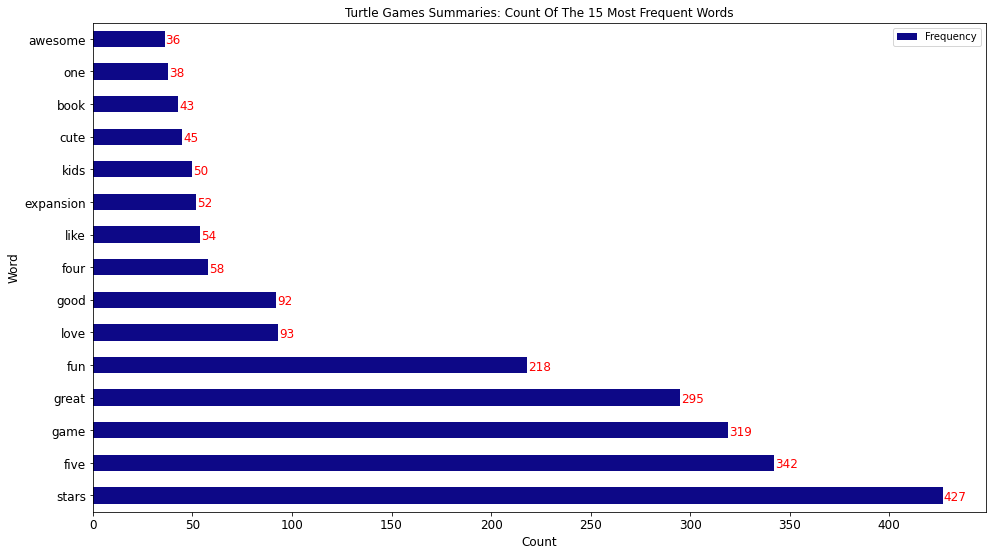

In [40]:
# SUMMARY

# Creating a barplot to display the frequency counts
ax = counts_summary.plot(kind = 'barh', 
                         figsize = (16, 9), 
                         fontsize = 12, 
                         colormap = 'plasma')

# Changing the axis labels and title
ax.set_xlabel('Count', fontsize = 12)
ax.set_ylabel('Word', fontsize = 12)
ax.set_title('Turtle Games Summaries: Count Of The 15 Most Frequent Words', fontsize = 12)

# For loop to create labels for each bar
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'red')

In [41]:
# Creating a copy of the DataFrame containing the top 15 words in summaries
# Resetting the index
top15_summary = counts_summary.reset_index()

# Viewing the DataFrame 
top15_summary

,Word,Frequency
0,stars,427
1,five,342
2,game,319
3,great,295
4,fun,218
5,love,93
6,good,92
7,four,58
8,like,54
9,expansion,52


In [42]:
# Populating a new column with the polarity scores for each word
top15_summary['Polarity'] = top15_summary['Word'].apply(generate_polarity)

# Viewing the result
top15_summary

,Word,Frequency,Polarity
0,stars,427,0.0
1,five,342,0.0
2,game,319,-0.4
3,great,295,0.8
4,fun,218,0.3
5,love,93,0.5
6,good,92,0.7
7,four,58,0.0
8,like,54,0.0
9,expansion,52,0.0


### Investigating customer's polarity and sentiment

In [43]:
# Creating a list of the reviews
review_list = opinions_copy['r_tokens'].values.tolist()

# Removing stopwords and words that are not alphanumeric from this list 
review_list1 = [[y for y in x if y.lower() not in english_stopwords and y.isalnum()] for x in review_list]

# Viewing this list
review_list1

[['comes',
  'dms',
  'screen',
  'space',
  'screen',
  'absolute',
  'premium',
  'fact',
  '50',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'needed',
  'art',
  'well',
  'makes',
  'completely',
  'useless',
  'reason',
  'gave',
  '2',
  'stars',
  '1',
  'technically',
  'speaking',
  'least',
  'still',
  'stand',
  'block',
  'notes',
  'dice',
  'rolls',
  'drops',
  'ball',
  'completely'],
 ['open',
  'letter',
  'galeforce9',
  'unpainted',
  'miniatures',
  'bad',
  'spell',
  'cards',
  'great',
  'board',
  'games',
  'meh',
  'dm',
  'screens',
  'however',
  'freaking',
  'terrible',
  'im',
  'still',
  'waiting',
  'single',
  'screen',
  'isnt',
  'polluted',
  'pointless',
  'artwork',
  'useful',
  'referenceable',
  'tables',
  'youve',
  'created',
  'single',
  'use',
  'screen',
  'useful',
  'running',
  'storm',
  'kings',
  'thunder',
  'adventure',
  'even',
  'despite',
  'fact',
  'geared',
  'adventure',
  'path',
  'usefulness',
 

In [44]:
# Creating a variable to store the SentimentIntensityAnalyzer() method
sia = SentimentIntensityAnalyzer()

# Creating a dictionary to store each cleaned review and its respective polarity scores 
# This will return four values in a dictionary
r_sentiment = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in review_list1}

# Converting the list of dictionary results to a Pandas DataFrame
review_scores = pd.DataFrame(r_sentiment).T.reset_index()

# Changing column names
review_scores.rename(columns = {'index': 'review'}, inplace = True)

# Defining a function to extract the subjectivity score for each word/comment
def generate_subjectivity(word):
    return TextBlob(word).sentiment[1]

# Populating a new column with the subjectivity scores for each review
review_scores['subjectivity'] = review_scores['review'].apply(generate_subjectivity)

# Viewing the DataFrame
review_scores

,review,neg,neu,pos,compound,subjectivity
0,comes dms screen space screen absolute premium...,0.285,0.668,0.047,-0.8932,0.428571
1,open letter galeforce9 unpainted miniatures ba...,0.184,0.542,0.274,0.8434,0.438796
2,nice art nice printing two panels filled gener...,0.181,0.588,0.230,0.7281,0.417217
3,amazing buy bought gift new dm perfect,0.000,0.278,0.722,0.8860,0.784848
4,review gf9s previous screens completely unnece...,0.370,0.630,0.000,-0.7063,0.316667
...,...,...,...,...,...,...
1922,retired find great way stay alert spelling voc...,0.000,0.574,0.426,0.8860,0.633333
1923,perfect word game mixed ages mom perhaps givin...,0.000,0.464,0.536,0.9137,0.491667
1924,great game think would like first received tur...,0.000,0.532,0.468,0.9062,0.310043
1925,great game keeps mind nimble,0.000,0.494,0.506,0.6249,0.575000


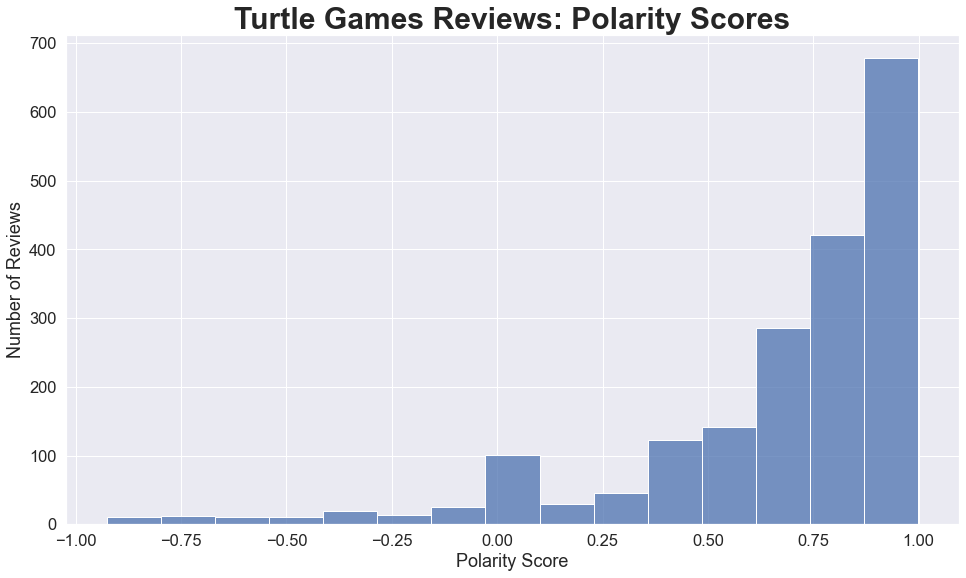

In [45]:
# REVIEW: Polarity

# Setting the plot size and font scale
sns.set(rc = {'figure.figsize':(16, 9)}, font_scale = 1.5)

# Creating a histogram of the compound values
sns.histplot(data = review_scores['compound'],
            bins = 15)

# Changing the title and axis labels
plt.title("Turtle Games Reviews: Polarity Scores", 
          fontweight = "bold",
          fontsize = 30)
plt.xlabel("Polarity Score")
plt.ylabel("Number of Reviews")

# Showing the plot
plt.show()

Here, we can see that the polarity scores for reviews are negatively skewed. The histogram shows that a lot of the reviews had a positive sentiment (polarity score above 0). This is good for Turtle Games.

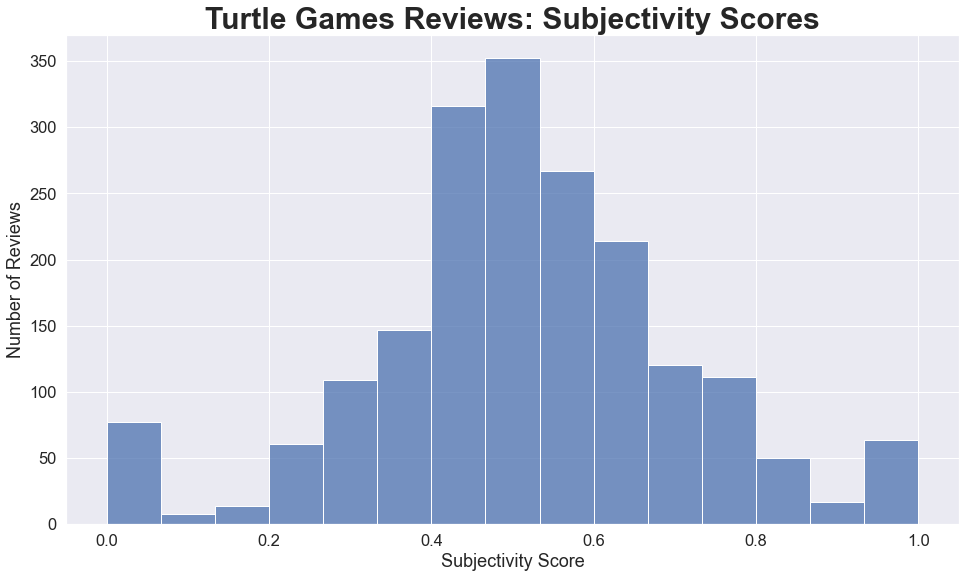

In [46]:
# REVIEW: Subjectivity

# Setting the plot size and font scale
sns.set(rc = {'figure.figsize':(16, 9)}, font_scale = 1.5)

# Creating a histogram of the compound values
sns.histplot(data = review_scores['subjectivity'],
            bins = 15)

# Changing the title and axis labels
plt.title("Turtle Games Reviews: Subjectivity Scores", 
          fontweight = "bold",
          fontsize = 30)
plt.xlabel("Subjectivity Score")
plt.ylabel("Number of Reviews")

# Showing the plot
plt.show()

This follows a fairly normal distribution with some peaks at either end (0 and 1). 

In [47]:
# Creating a list of the summaries
summary_list = opinions_copy['s_tokens'].values.tolist()

# Removing stopwords and words that are not alphanumeric from this list 
summary_list1 = [[y for y in x if y.lower() not in english_stopwords and y.isalnum()] for x in summary_list]

# Viewing this list
summary_list1

[['fact',
  '50',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'needed',
  'art'],
 ['another', 'worthless', 'dungeon', 'masters', 'screen', 'galeforce9'],
 ['pretty', 'also', 'pretty', 'useless'],
 ['five', 'stars'],
 ['money', 'trap'],
 ['five', 'stars'],
 ['best', 'gm', 'screen', 'ever'],
 ['five', 'stars'],
 ['great', 'could', 'even', 'better'],
 ['another', 'missed', 'opportunity', 'value', 'add', 'product', 'line'],
 ['five', 'stars'],
 ['love', 'map'],
 ['general', 'dm', 'screen'],
 ['weak', 'game'],
 ['fell', 'completely', 'flat'],
 ['five', 'stars'],
 ['good', 'book'],
 ['buckley', 'card', 'mommer'],
 ['advanced', 'good', 'gets'],
 ['better', 'know', 'youre', 'getting'],
 ['dont', 'bother'],
 ['worst', 'value', 'ive', 'ever', 'seen'],
 ['enough', 'product'],
 ['good', 'product'],
 ['temporary', 'tattoos', 'good', 'gift'],
 ['huge', 'hit'],
 ['gorgeous', 'pictures'],
 ['five', 'stars'],
 ['wonderful', 'designs'],
 ['wow', 'great', 'coloring', 'book'],
 ['nic

In [48]:
# Creating a dictionary to store each cleaned summary and its respective polarity scores 
# This will return four values in a dictionary
s_sentiment = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summary_list1}

# Converting the list of dictionary results to a Pandas DataFrame
summary_scores = pd.DataFrame(s_sentiment).T.reset_index()

# Changing column names
summary_scores.rename(columns = {'index': 'review'}, inplace = True)

# Populating a new column with the subjectivity scores for each summary
summary_scores['subjectivity'] = summary_scores['review'].apply(generate_subjectivity)

# Viewing the DataFrame
summary_scores

,review,neg,neu,pos,compound,subjectivity
0,fact 50 space wasted art terribly informative ...,0.493,0.507,0.000,-0.7783,0.500000
1,another worthless dungeon masters screen galef...,0.367,0.633,0.000,-0.4404,0.900000
2,pretty also pretty useless,0.275,0.098,0.627,0.5574,0.733333
3,five stars,0.000,1.000,0.000,0.0000,0.000000
4,money trap,0.697,0.303,0.000,-0.3182,0.000000
...,...,...,...,...,...,...
1287,fun card game people like words,0.000,0.408,0.592,0.7003,0.300000
1288,sort card game equivalent scrabble lot easier,0.000,0.682,0.318,0.4215,0.400000
1289,great game keep mind active,0.000,0.306,0.694,0.7783,0.583333
1290,great mind game,0.000,0.328,0.672,0.6249,0.575000


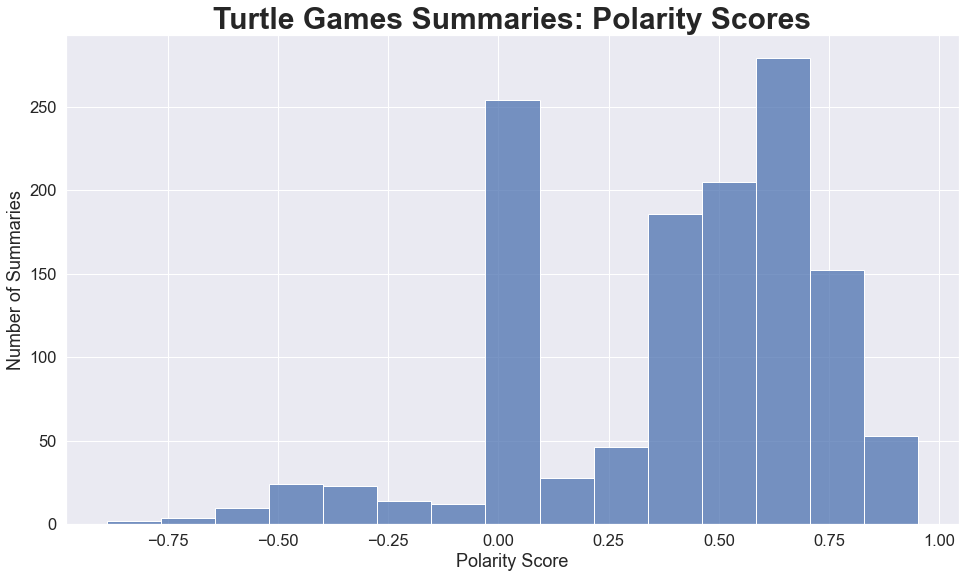

In [49]:
# SUMMARY: Polarity

# Setting the plot size and font scale
sns.set(rc = {'figure.figsize':(16, 9)}, font_scale = 1.5)

# Creating a histogram of the compound values
sns.histplot(data = summary_scores['compound'],
             bins = 15)

# Changing the title and axis labels
plt.title("Turtle Games Summaries: Polarity Scores", 
          fontweight = "bold",
          fontsize = 30)
plt.xlabel("Polarity Score")
plt.ylabel("Number of Summaries")

# Showing the plot
plt.show()

Here, we can see that the polarity scores for summaries are negatively skewed. The histogram shows that a lot of the reviews had a positive sentiment (polarity score above 0). This is good for Turtle Games. We can also see that there were many summaries that had a polarity score around 0. This means that a lot of the summaries had a neutral sentiment towards Turtle Games. This means that there are still many customers who could/should be converted to having a more positive sentiment towards Turtle Games. 

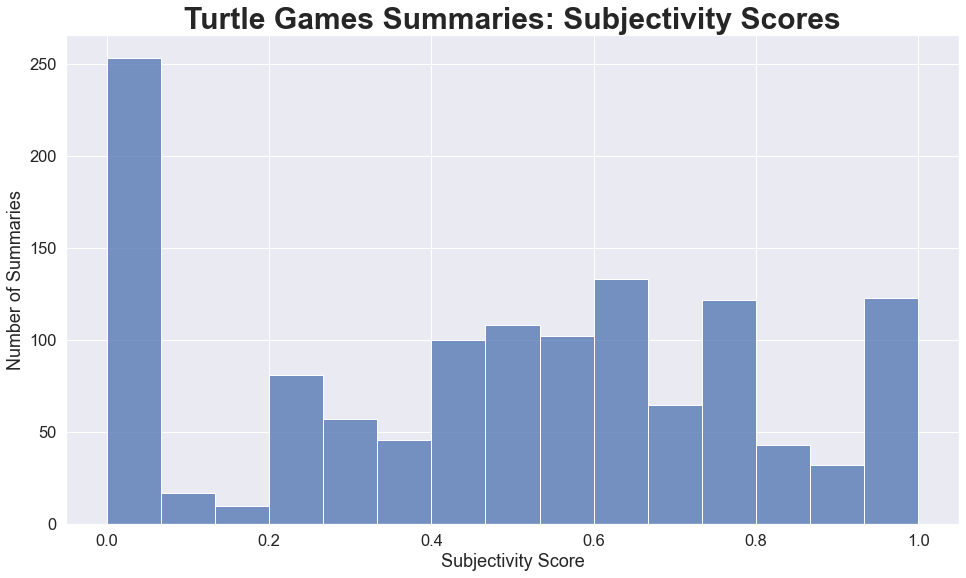

In [50]:
# REVIEW: Subjectivity

# Setting the plot size and font scale
sns.set(rc = {'figure.figsize':(16, 9)}, font_scale = 1.5)

# Creating a histogram of the compound values
sns.histplot(data = summary_scores['subjectivity'],
             bins = 15)

# Changing the title and axis labels
plt.title("Turtle Games Summaries: Subjectivity Scores", 
          fontweight = "bold",
          fontsize = 30)
plt.xlabel("Subjectivity Score")
plt.ylabel("Number of Summaries")

# Showing the plot
plt.show()

### Identifying the top 10 positive/negative reviews and summaries

In [51]:
# Finding the top 10 negative reviews by compund polarity score 
review_scores.sort_values('compound').head(10)

,review,neg,neu,pos,compound,subjectivity
358,found card game opposite intended actually kid...,0.326,0.505,0.168,-0.9264,0.488889
1122,dig shame 56 years ago wasnt running rpgs prob...,0.255,0.681,0.064,-0.9195,0.705952
1511,one ring innovative rpg set middle earth time ...,0.172,0.679,0.149,-0.8966,0.464432
0,comes dms screen space screen absolute premium...,0.285,0.668,0.047,-0.8932,0.428571
863,crappy cardboard ghost original hard believe s...,0.723,0.157,0.120,-0.8885,0.763889
1746,ball whacks valuable tool distraction refocusi...,0.319,0.438,0.243,-0.8807,0.544866
417,uno questions anger okay way discuss anger get...,0.491,0.427,0.081,-0.8625,0.388095
279,bought thinking would really fun disappointed ...,0.455,0.427,0.118,-0.8513,0.511905
342,8 yearold granddaughter frustrated discouraged...,0.520,0.359,0.121,-0.8360,0.450000
1742,im high school math teacher cant keep ball wha...,0.195,0.669,0.136,-0.8028,0.527784


In [52]:
# Finding the top 10 positive reviews by compound polarity score
review_scores.sort_values('compound').tail(10)

,review,neg,neu,pos,compound,subjectivity
817,dont know ive ever taken delight realizing til...,0.105,0.661,0.235,0.9969,0.466708
1038,fan dungeons dragons adventureexploration game...,0.075,0.634,0.291,0.9971,0.483605
1322,lords waterdeep scoundrels skullport expansion...,0.036,0.713,0.250,0.9975,0.504068
1264,lords waterdeep awesome scoundrels skullport m...,0.089,0.702,0.209,0.9977,0.476271
1522,dad two boys im always lookout activities us t...,0.042,0.706,0.252,0.9979,0.451765
1078,middle aged married guy loves sci fi video gam...,0.099,0.643,0.258,0.9985,0.502175
1616,employ one creativityenhancing resource rest l...,0.059,0.712,0.229,0.9985,0.533449
353,kit awesome 5year old daughter made chihuahua ...,0.029,0.607,0.364,0.9988,0.535538
860,whenever see game shelf get disturbing visual ...,0.021,0.787,0.192,0.9992,0.412389
1096,disclaimer bought local store paid list value ...,0.041,0.693,0.266,0.9992,0.503992


In [53]:
# Finding the top 10 negative summaries by compound polarity score
summary_scores.sort_values('compound').head(10)

,review,neg,neu,pos,compound,subjectivity
604,crappy cardboard ghost original hard believe s...,0.723,0.157,0.12,-0.8885,0.763889
0,fact 50 space wasted art terribly informative ...,0.493,0.507,0.00,-0.7783,0.500000
1050,tardis doctor river song amy rory fight every ...,0.433,0.567,0.00,-0.7269,0.000000
230,defective poor qc,0.857,0.143,0.00,-0.7184,0.600000
695,find board game dumb boring,0.651,0.349,0.00,-0.6808,0.633333
805,bad set limited applicability,0.730,0.270,0.00,-0.6597,0.404762
808,hated running rpg campaign dealing towns,0.457,0.543,0.00,-0.6369,0.700000
578,worst quality adult board game ive even seen,0.369,0.631,0.00,-0.6249,0.566667
657,20 sided die,0.661,0.339,0.00,-0.5994,0.000000
260,anger control game,0.649,0.351,0.00,-0.5719,0.300000


In [54]:
# Finding the top 10 positive summaries by compound score 
summary_scores.sort_values('compound').tail(10)

,review,neg,neu,pos,compound,subjectivity
672,wish buy better luck fairly easy understand pl...,0.0,0.258,0.742,0.8885,0.666667
820,great game value price great also,0.0,0.221,0.779,0.8910,0.633333
708,great game great value,0.0,0.086,0.914,0.8910,0.633333
1241,easy fun fast thoroughly enjoyable adults well...,0.0,0.338,0.662,0.8947,0.558333
476,great quality cute perfect toddler,0.0,0.156,0.844,0.8957,0.916667
1038,loves stickers loves peppa perfect,0.0,0.153,0.847,0.9022,1.000000
1271,easy learn great fun play,0.0,0.073,0.927,0.9136,0.594444
1140,great playing great creative workshops,0.0,0.072,0.928,0.9169,0.833333
781,wrath ashardalon great investment avid rpg fan...,0.0,0.300,0.700,0.9186,0.875000
827,wow great set tiles great price great starter set,0.0,0.237,0.763,0.9524,0.812500


# 

## Who Should We Prioritise Our Marketing Efforts For?

One group of customers Turtle Games should prioritise their marketing efforts on are loyal customers. An indicator of loyalty is loyalty points gained by a customer. To better understand how we can identify and predict loyal customers, we can see what factors influence the number of loyalty points a customer has. Therefore, we will look at creating various linear regression models and choose the best one to predict the number of loyalty points a customer has.

In [55]:
# Checking the correlation of loyalty_points with other variables
df_reviews.corr()['loyalty_points']

age              -0.042445
remuneration      0.616065
spending_score    0.672310
loyalty_points    1.000000
product           0.183600
Name: loyalty_points, dtype: float64

It appears that loyalty points has a weak positive correlation with both spending score and remuneration. This suggests that these variables might be significant when fitting a linear model for the number of loyalty points. Let's look at how a linear regression model would perform with each of these variables and age. We can start with the variables individually and then begin to build a bigger model.

### Spending vs Loyalty

<AxesSubplot:xlabel='spending_score', ylabel='loyalty_points'>

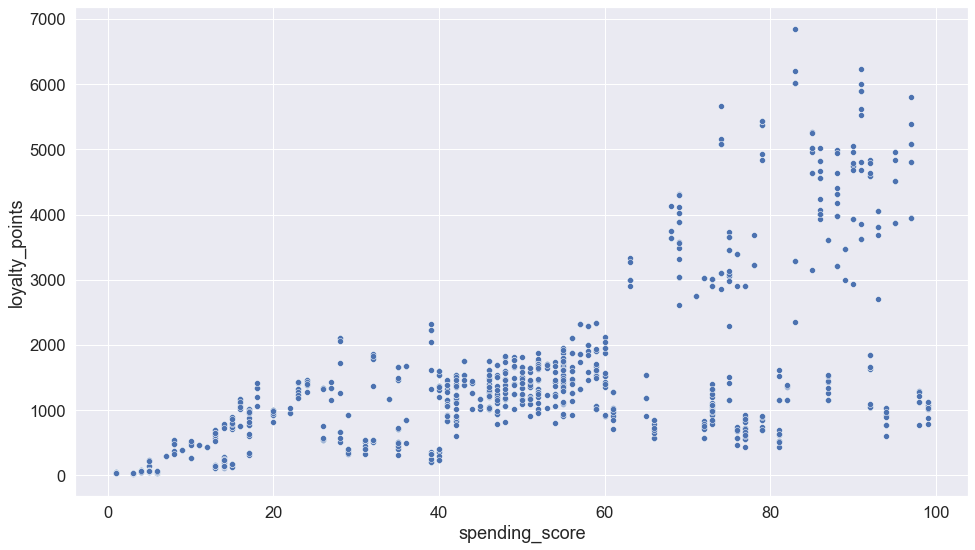

In [56]:
# Checking the linearity of the relationship between spending_score
# and loyalty_points
# Creating a scatterplot of spending_score and loyalty_points
sns.scatterplot(x = 'spending_score',
                y = 'loyalty_points',
                data = df_reviews)

This does not show a clear linear relationship, which could be a limitation of the model created with these two variables.

In [57]:
# Defining the dependent variable
# Reshaping the values for the regression model
y = df_reviews['loyalty_points'].values.reshape(-1, 1) 

# Defining the independent variable
# Reshaping the values for the regression model
x = df_reviews['spending_score'].values.reshape(-1, 1) 

# Splitting the data into 'train' (70%) and 'test' (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 17)

In [58]:
# Training the model using the statsmodel OLS library
modela = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Calling a summary of the model
print_model = modela.summary()

# Printing the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     1165.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          3.36e-186
Time:                        10:56:49   Log-Likelihood:                -11576.
No. Observations:                1400   AIC:                         2.316e+04
Df Residuals:                    1398   BIC:                         2.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -95.4635     55.106     -1.732      0.0

Here, we can see from the p-values that spending_score is significant in predicting loyalty_points. We can also see, from the R-squared value, that spending_score explains 45.4% of the variability in loyalty_points. As this is less than 50%, I would say that this is not a great model. This model suggests that for every single increase in spending_score, loyalty_points increases by 33.42 points.

In [59]:
# Checking the accuracy of this model on the test data set

# Fitting the model with the added constant
y_pred = modela.predict(sm.add_constant(x_test))

# Printing the mean absolute error and mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 688.8832543845734
Mean Squared Error: 930202.7371565801


### Remuneration vs Loyalty

<AxesSubplot:xlabel='remuneration', ylabel='loyalty_points'>

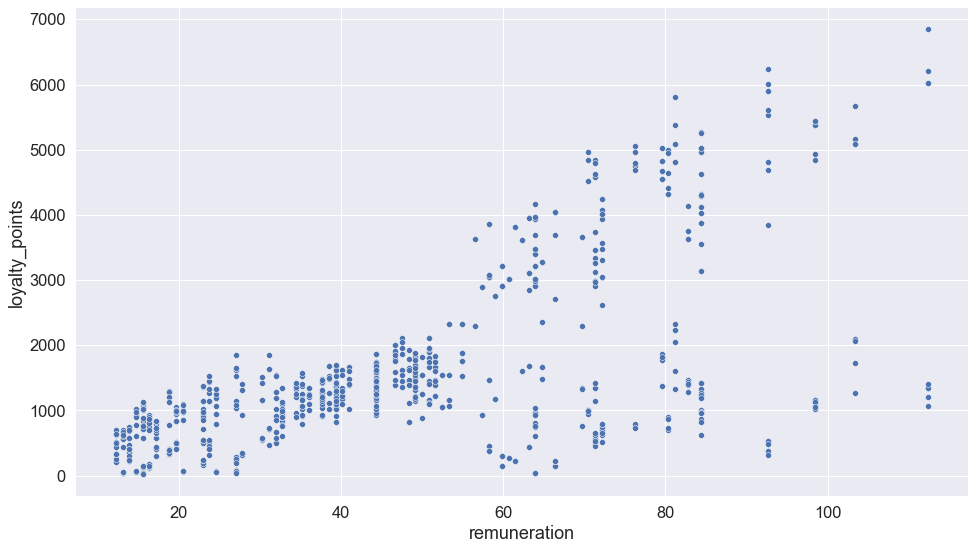

In [60]:
# Checking the linearity of the relationship between remuneration
# and loyalty_points
# Creating a scatterplot of remuneration and loyalty_points
sns.scatterplot(x = 'remuneration',
                y = 'loyalty_points',
                data = df_reviews)

This does not show a clear linear relationship, which could be a limitation of the model created with these two variables.

In [61]:
# Defining the independent variable
# Reshaping the values for the regression model
x = df_reviews['remuneration'].values.reshape(-1, 1) 

# Splitting the data into 'train' (70%) and 'test' (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 17)

In [62]:
# Training the model using the statsmodel OLS library
modelb = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Calling a summary of the model
print_model = modelb.summary()

# Printing the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     938.3
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          4.34e-158
Time:                        10:56:49   Log-Likelihood:                -11641.
No. Observations:                1400   AIC:                         2.329e+04
Df Residuals:                    1398   BIC:                         2.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -96.0356     60.661     -1.583      0.1

Here, we can see from the p-values that remuneration is significant in predicting loyalty_points. We can also see, from the R-squared value, that remuneration explains 40.2% of the variability in loyalty_points. As this is less than 50%, I would say that this is not a great model. This model suggests that for every unit increase in remuneration (£k), loyalty_points increases by 35.19 points.

In [63]:
# Checking the accuracy of this model on the test data set

# Fitting the model with the added constant
y_pred = modelb.predict(sm.add_constant(x_test))

# Printing the mean absolute error and mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 775.5241751738017
Mean Squared Error: 1129059.0228070244


This is less accurate than modela.

### Age vs Loyalty

<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

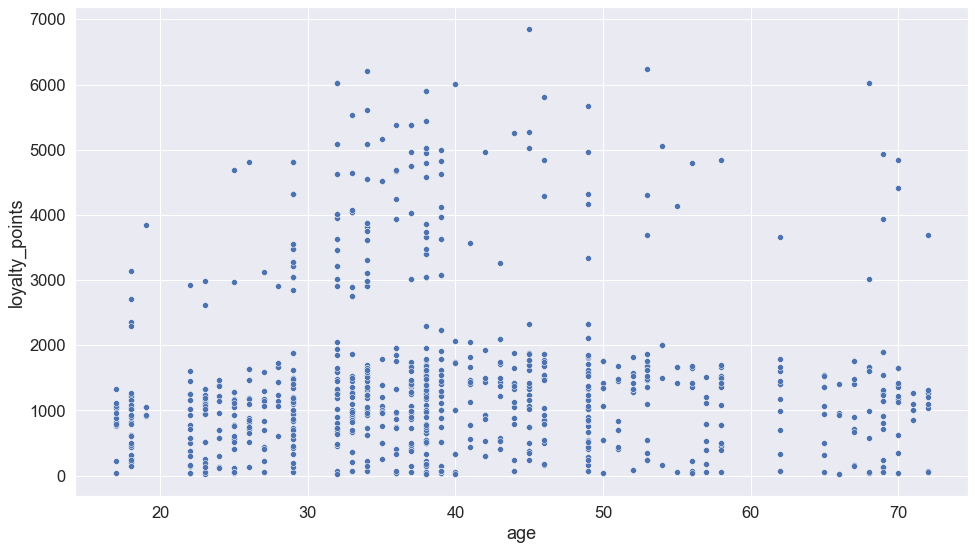

In [64]:
# Checking the linearity of the relationship between age
# and loyalty_points
# Creating a scatterplot of age and loyalty_points
sns.scatterplot(x = 'age',
                y = 'loyalty_points',
                data = df_reviews)

This does not show a linear relationship at all, which could be a limitation of the model created with these two variables.

In [65]:
# Defining the independent variable
# Reshaping the values for the regression model
x = df_reviews['age'].values.reshape(-1, 1) 

# Splitting the data into 'train' (70%) and 'test' (30%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 17)

In [66]:
# Training the model using the statsmodel OLS library
modelc = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Calling a summary of the model
print_model = modelc.summary()

# Printing the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.534
Date:                Mon, 24 Apr 2023   Prob (F-statistic):              0.112
Time:                        10:56:50   Log-Likelihood:                -11999.
No. Observations:                1400   AIC:                         2.400e+04
Df Residuals:                    1398   BIC:                         2.401e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1733.5601    104.398     16.605      0.0

Here, we can see from the p-values that age is not significant in predicting loyalty_points. We can also see, from the R-squared value, that age explains 0.2% of the variability in loyalty_points. This is not very good at all. I would say that this is not a good model. This model suggests that for every year increase in age, loyalty_points decreases by 3.95 points.

In [67]:
# Checking the accuracy of this model on the test data set

# Fitting the model with the added constant
y_pred = modelc.predict(sm.add_constant(x_test))

# Printing the mean absolute error and mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 946.1883273269077
Mean Squared Error: 1676615.2173336658


This is less accurate than modela and modelb

### Spending and Remuneration vs Loyalty

In [68]:
# Defining the independent variables
X = df_reviews[['spending_score', 'remuneration']]

# Splitting the data into 'train' (70%) and 'test' (30%) sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.30,
                                                                            random_state = 17)

In [69]:
# Training the model using the statsmodel OLS library
modeld = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Calling a summary of the model
print_model = modeld.summary()

# Printing the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     3287.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:56:50   Log-Likelihood:                -10781.
No. Observations:                1400   AIC:                         2.157e+04
Df Residuals:                    1397   BIC:                         2.158e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1645.0179     42.307    -38.

Here, we can see from the p-values that spending_score and remuneration are both significant in predicting loyalty_points. We can also see, from the adjusted R-squared value, that this model explains 82.4% of the variability in loyalty_points. This is much better than any of the other models we created. I would say this is a good model. This model suggests that, if other variables stay the same, for every single increase in spending_score, loyalty_points increases by 32.27 points. Similarly, if other variables stay the same, for every unit increase in remuneration (£k), loyalty_points increases by 33.82 points.

In [70]:
# Checking the accuracy of this model on the test data set

# Fitting the model with the added constant
Y_pred = modeld.predict(sm.add_constant(X_test))

# Printing the mean absolute error and mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 418.93467631594444
Mean Squared Error: 284266.6659305679


This is the most accurate model yet.

### Spending, Remuneration, and Age vs Loyalty

In [71]:
# Defining the independent variables
X = df_reviews[['spending_score', 'remuneration', 'age']]

# Splitting the data into 'train' (70%) and 'test' (30%) sets
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.30,
                                                                            random_state = 17)

In [72]:
# Training the model using the statsmodel OLS library
modele = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Calling a summary of the model
print_model = modele.summary()

# Printing the summary
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2369.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:56:50   Log-Likelihood:                -10735.
No. Observations:                1400   AIC:                         2.148e+04
Df Residuals:                    1396   BIC:                         2.150e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2100.5935     62.323    -33.

Here, we can see from the p-values that spending_score, remuneration, and age are all significant in predicting loyalty_points. We can also see, from the adjusted R-squared value, that this model explains 83.5% of the variability in loyalty_points. This is the best yet. I would say this is a really good model. This model suggests that, if other variables stay the same, for every single increase in spending_score, loyalty_points increases by 33.44 points. Similarly, if other variables stay the same, for every unit increase in remuneration (£k), loyalty_points increases by 33.78 points. And finally, if other variables stay the same, for every year increase in age, loyalty_points increases by 10 points. 

In [73]:
# Checking the accuracy of this model on the test data set 

# Fitting the model with the added constant
Y_pred = modele.predict(sm.add_constant(X_test))

# Printing the mean absolute error and mean squared error
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 395.27884756864853
Mean Squared Error: 255429.2031804622


This is the most accurate model yet, according to the mean absolute error. This is the model we will use to predict loyalty_points.

In [74]:
# Checking for multicollinearity in the model

# Adding a constant
x_temp = sm.add_constant(X_train)

# Creating an empty DataFrame
vif = pd.DataFrame()

# Calculating the variance inflation factors
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]

# Creating the feautures column
vif['features'] = x_temp.columns

# Printing the values to 2 decimal places
print(vif.round(2))

   VIF Factor        features
0       20.24           const
1        1.05  spending_score
2        1.00    remuneration
3        1.05             age


VIF values are close to 1 for all variables ie. little correlation between variables (good).

In [75]:
# Checking for homoscedasticity

# Running the Breusch-Pagan test function on the model residuals and x-variables
test = sms.het_breuschpagan(modele.resid, modele.model.exog)

# Printing the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 44.21247702417315, 'LM Test p-value': 1.3602054932883901e-09, 'F-stat': 15.174604397763526, 'F-test p-value': 1.0137863602748946e-09}


The p-value is significant suggesting there is heteroscedasticity in the model which is not good. This is a limitation of our model.

# 

## Should We Have Different Marketing Strategies For Different Types Of Customers?

To answer this question we can look to identify different groups within the customer base. Once we know these groups, we can plan different marketing strategies that are best suited to these different types of customers. 

In [76]:
# Creating a new DataFrame containing just remuneration and spending_score
sub_df = df_reviews[['remuneration', 'spending_score']]

# Viewing the DataFrame
sub_df.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [77]:
# Viewing the metadata of this new DataFrame
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


There are no missing values.

In [78]:
# Descriptive statistics of this new DataFrame
sub_df.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


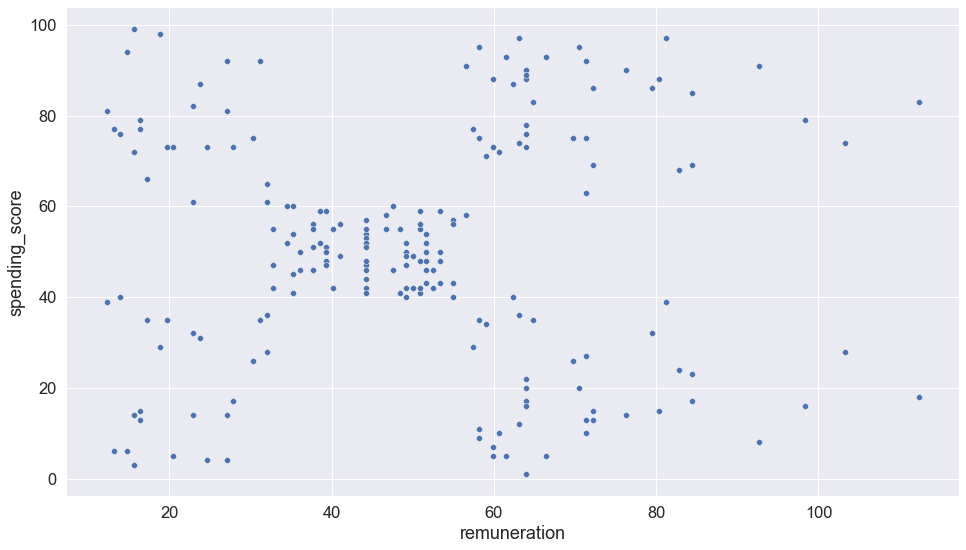

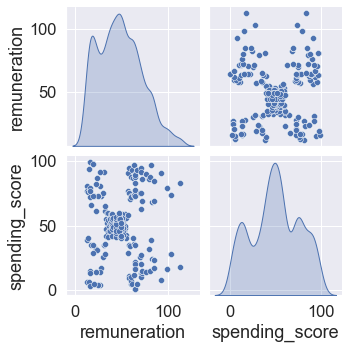

In [79]:
# Creating a scatterplot of remuneration vs spending_score
sns.scatterplot(x = 'remuneration',
                y = 'spending_score',
                data = sub_df)


# Creating a pairplot of remuneration and spending_score
sns.pairplot(sub_df,
             diag_kind = 'kde')

Looking at these plots, there already seems to be five clusters going on (one in each corner and one in the middle).

Let's look at what the optimum number of clusters is by using the elbow and silhouette methods.

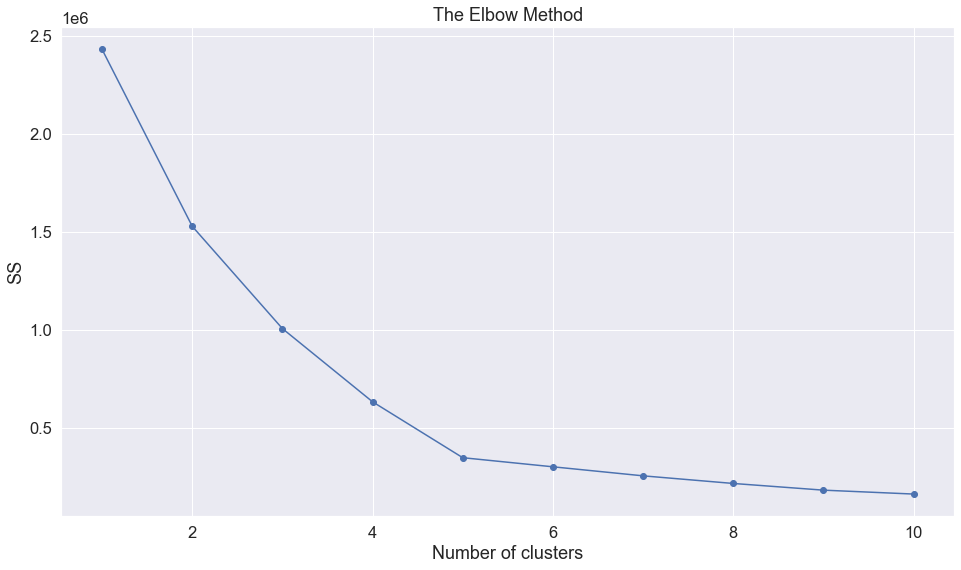

In [80]:
# ELBOW METHOD

# Creating an elbow chart to decide on the number of optimal clusters
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 17)
    kmeans.fit(sub_df)
    ss.append(kmeans.inertia_)

# Plotting the chart
plt.plot(range(1, 11),
         ss,
         marker='o')

# Changing the title and axis labels
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

# Showing the plot
plt.show()

There seems to be a bend in the curve around 5. We can try different numbers of clusters around 5 to see which makes the most sense.

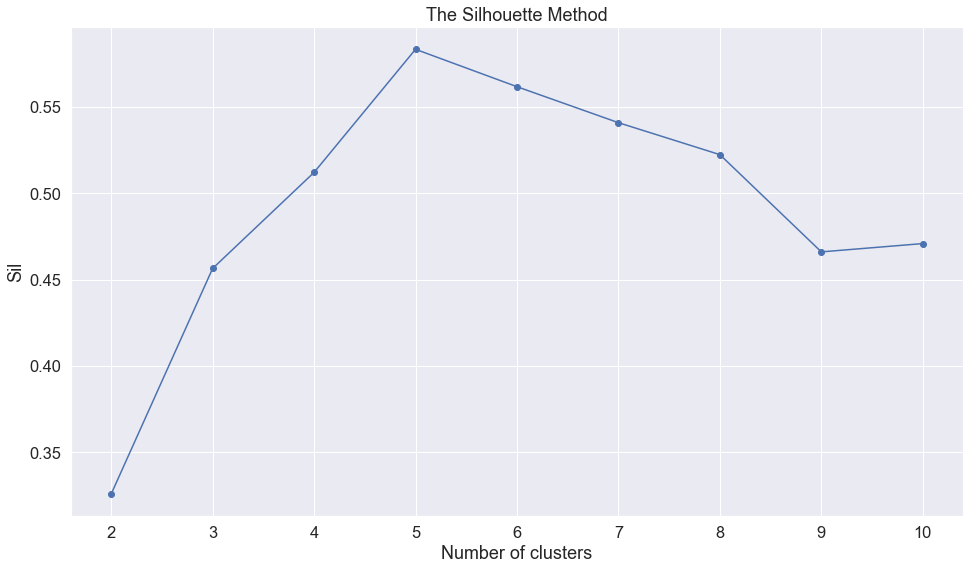

In [81]:
# SILHOUETTE METHOD

# Creating a silhouette chart to decide on the number of optimal clusters
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(sub_df)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(sub_df,
                                labels,
                                metric = 'euclidean'))

# Plotting the chart
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Changing the title and axis labels
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# Showing the plot
plt.show()

There seems to be a peak in the graph around 5 clusters. We can try different numbers of clusters around 5 to see which makes the most sense.

> Let's try four, five, six, and seven clusters.

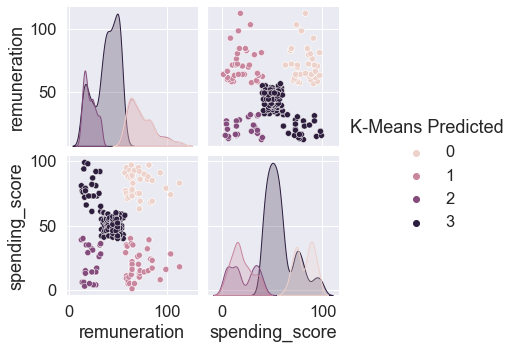

In [82]:
# Using k-means clustering to partition the data
# Changing the number for different numbers of clusters
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init = 'k-means++',
                random_state = 17).fit(sub_df)

# Adding a clusters column to the DataFrame
clusters = kmeans.labels_
sub_df['K-Means Predicted'] = clusters

# Creating a pairplot to show the clusters
sns.pairplot(sub_df,
             hue = 'K-Means Predicted',
             diag_kind = 'kde')

In [83]:
# Checking the number of observations per predicted cluster
sub_df['K-Means Predicted'].value_counts()

3    1013
0     356
1     351
2     280
Name: K-Means Predicted, dtype: int64

As thought, it appears that 5 clusters makes the most sense.

### Fitting The Final Model - 5 Clusters

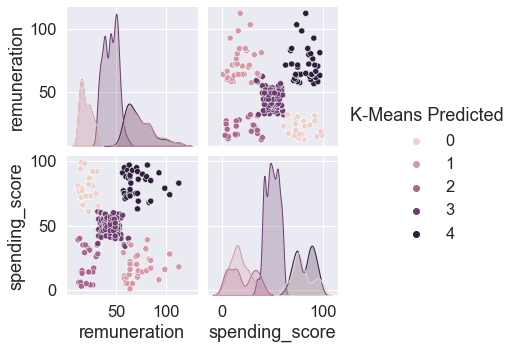

In [84]:
# Applying the final model with five clusters

# Using k-means clustering to partition the data
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init = 'k-means++',
                random_state = 17).fit(sub_df)

# Adding a clusters column to the DataFrame
clusters = kmeans.labels_
sub_df['K-Means Predicted'] = clusters

# Creating a pairplot to show the clusters
sns.pairplot(sub_df,
             hue = 'K-Means Predicted',
             diag_kind = 'kde')

In [85]:
# Checking the number of observations per predicted cluster
sub_df['K-Means Predicted'].value_counts()

3    774
4    356
1    330
2    271
0    269
Name: K-Means Predicted, dtype: int64

### Plotting And Interpretting The Clusters

In [86]:
# Viewing the K-Means predicted
print(sub_df.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  2
1         12.30              81                  0
2         13.12               6                  2
3         13.12              77                  0
4         13.94              40                  2


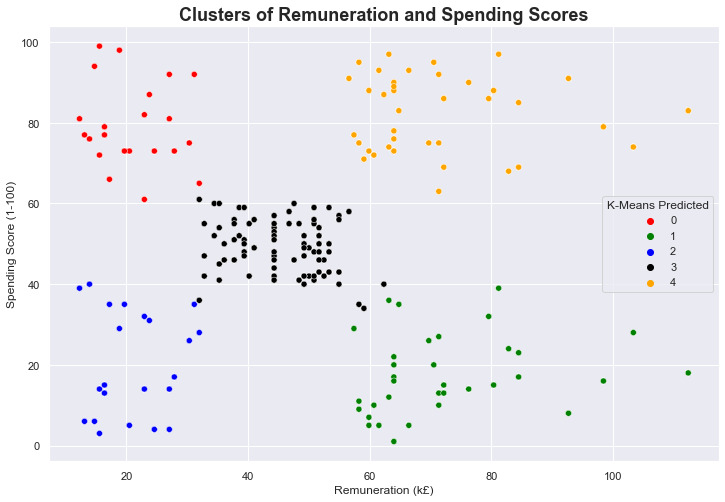

In [87]:
# Visualising the clusters

# Setting the plot size
sns.set(rc = {'figure.figsize':(12, 8)})

# Plotting the clusters
sns.scatterplot(x = 'remuneration' , 
                y ='spending_score',
                data = sub_df , 
                hue = 'K-Means Predicted',
                palette = ['red', 'green', 'blue', 'black', 'orange'])

# Changing the title and axis labels
plt.title("Clusters of Remuneration and Spending Scores", 
          fontweight = "bold",
          fontsize = 18)
plt.xlabel("Remuneration (k£)")
plt.ylabel("Spending Score (1-100)")

# Showing the plot
plt.show()

There appears to be five groups within the customer base. These are:

 - 0: Low remuneration, high spending score
 - 1: High remuneration, low spending score
 - 2: Low remuneration, low spending score
 - 3: Middle remuneration, middle spending score
 - 4: High remuneration, high spending score
 
Knowing these groups means different marketing strategies can be applied that best suit each group eg. marketing more expensive products to group 4 who are customers with higher remuneration and spending scores.  